# Nigel session:  Ethical  intelligence

# Rob session: NLP for ML 

In [9]:
import csv
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
with open('Bank Reviews with cust ID v2.csv', 'r', encoding = 'latin1') as f:
    reader = csv.reader(f)
    complaintList = list(reader)

In [11]:
df = pd.DataFrame(complaintList)
df.columns = ['customerID', 'summary', 'complaintText']
df

,customerID,summary,complaintText
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ..."
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...
...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...


# Bag-of-words: Organising the text for ease of analysis 

In [12]:
vectorizer = CountVectorizer(stop_words='english', min_df=0.005)
bagOfWords = vectorizer.fit_transform(df['complaintText'])
vectorizer.get_feature_names()


['00',
 '000',
 '10',
 '100',
 '1000',
 '11',
 '12',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1st',
 '20',
 '200',
 '2014',
 '2015',
 '2016',
 '2017',
 '22',
 '24',
 '25',
 '250',
 '28',
 '30',
 '300',
 '30th',
 '35',
 '40',
 '45',
 '48',
 '50',
 '500',
 '60',
 '90',
 'ability',
 'able',
 'abroad',
 'absolute',
 'absolutely',
 'abysmal',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'account',
 'accounts',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'additional',
 'address',
 'admit',
 'admitted',
 'advantage',
 'advice',
 'advise',
 'advised',
 'adviser',
 'advisor',
 'advisors',
 'affected',
 'afford',
 'afternoon',
 'age',
 'agent',
 'agents',
 'ages',
 'ago',
 'agreed',
 'agreement',
 'allow',
 'allowed',
 'alternative',
 'amazing',
 'amounts',
 'angry',
 'annoying',
 'answer',
 'answered',
 'answering',
 'answers',
 'anymore',
 'apart',
 'apologies',
 'apology',
 'app',
 'appalling',
 'apparent',
 'apparently',
 'appear',
 'ap

In [13]:
bow_pd = pd.DataFrame(bagOfWords.toarray())
bow_pd.columns = vectorizer.get_feature_names()
bow_pd

,00,000,10,100,1000,11,12,14,15,16,...,writing,written,wrong,wrote,year,years,yes,yesterday,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1801,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pareto of word frequerncy 

In [14]:
sum_words = bagOfWords.sum(axis=0)
sum_words

matrix([[ 25,  43, 160, ...,  20,  25,  36]], dtype=int64)

In [15]:
words_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq

[('disabled', 32),
 ('person', 156),
 ('branch', 732),
 ('told', 607),
 ('walk', 20),
 ('area', 20),
 ('till', 24),
 ('complained', 35),
 ('said', 420),
 ('reported', 12),
 ('banking', 578),
 ('ombudsman', 49),
 ('asked', 319),
 ('bank_name', 2152),
 ('working', 116),
 ('day', 280),
 ('bank', 1579),
 ('does', 85),
 ('held', 20),
 ('available', 50),
 ('bad', 172),
 ('customer', 841),
 ('service', 907),
 ('want', 213),
 ('human', 24),
 ('machine', 75),
 ('clear', 59),
 ('finance', 16),
 ('come', 98),
 ('visited', 19),
 ('today', 153),
 ('pay', 305),
 ('sum', 11),
 ('cash', 154),
 ('account', 1893),
 ('works', 32),
 ('home', 99),
 ('isn', 31),
 ('able', 127),
 ('quite', 56),
 ('debit', 201),
 ('card', 774),
 ('using', 101),
 ('machines', 20),
 ('morning', 55),
 ('didnt', 21),
 ('properly', 19),
 ('tried', 228),
 ('twice', 65),
 ('times', 190),
 ('money', 795),
 ('returned', 41),
 ('receipt', 22),
 ('saying', 127),
 ('cancelled', 52),
 ('walked', 24),
 ('away', 148),
 ('paying', 93),
 ('co

In [16]:
words_freq = sorted(words_freq, key=lambda x: x[1], reverse = True)
words_freq

[('bank_name', 2152),
 ('account', 1893),
 ('bank', 1579),
 ('service', 907),
 ('customer', 841),
 ('money', 795),
 ('card', 774),
 ('branch', 732),
 ('time', 623),
 ('told', 607),
 ('banking', 578),
 ('phone', 547),
 ('just', 527),
 ('years', 507),
 ('business', 499),
 ('online', 471),
 ('said', 420),
 ('staff', 379),
 ('new', 379),
 ('ve', 360),
 ('don', 358),
 ('got', 339),
 ('like', 337),
 ('days', 334),
 ('asked', 319),
 ('pay', 305),
 ('went', 301),
 ('customers', 299),
 ('did', 288),
 ('day', 280),
 ('people', 273),
 ('help', 267),
 ('accounts', 260),
 ('need', 256),
 ('credit', 256),
 ('use', 254),
 ('make', 250),
 ('know', 245),
 ('mortgage', 245),
 ('called', 237),
 ('open', 234),
 ('going', 234),
 ('complaint', 233),
 ('minutes', 232),
 ('months', 231),
 ('good', 229),
 ('tried', 228),
 ('didn', 225),
 ('number', 224),
 ('banks', 220),
 ('company', 217),
 ('weeks', 215),
 ('want', 213),
 ('trying', 209),
 ('really', 205),
 ('say', 205),
 ('received', 202),
 ('debit', 201),
 

In [17]:
wordParetoDF = pd.DataFrame(words_freq, columns=['Word', 'Count'])
wordParetoDF

,Word,Count
0,bank_name,2152
1,account,1893
2,bank,1579
3,service,907
4,customer,841
...,...,...
1291,loose,10
1292,names,10
1293,reduce,10
1294,increasing,10


<AxesSubplot:xlabel='Word'>

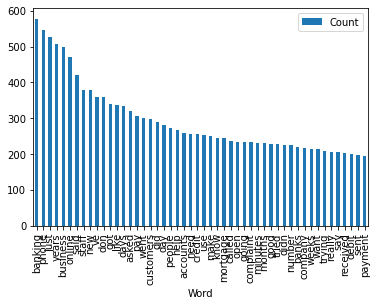

In [18]:
wordParetoDF[10:60].plot.bar(x = 'Word', y = 'Count')

#  Word-Cloud

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [21]:
df['complaintText']

0       As a disabled person in an empty branch, they ...
1       Bad customer service in branch and not enough ...
2        I visited the Bognor Regis BANK_NAME Branch t...
3        Abysmal business service. If you are a busine...
4        I have company account with BANK_NAME and got...
                              ...                        
1800     Worst ever service I have ever received.a bun...
1801     You are lucky to have a lady like Andrea in y...
1802     You are more likely to get offended than sort...
1803     You know you have to change banks when a tran...
1804     You would think that a changing your address"...
Name: complaintText, Length: 1805, dtype: object

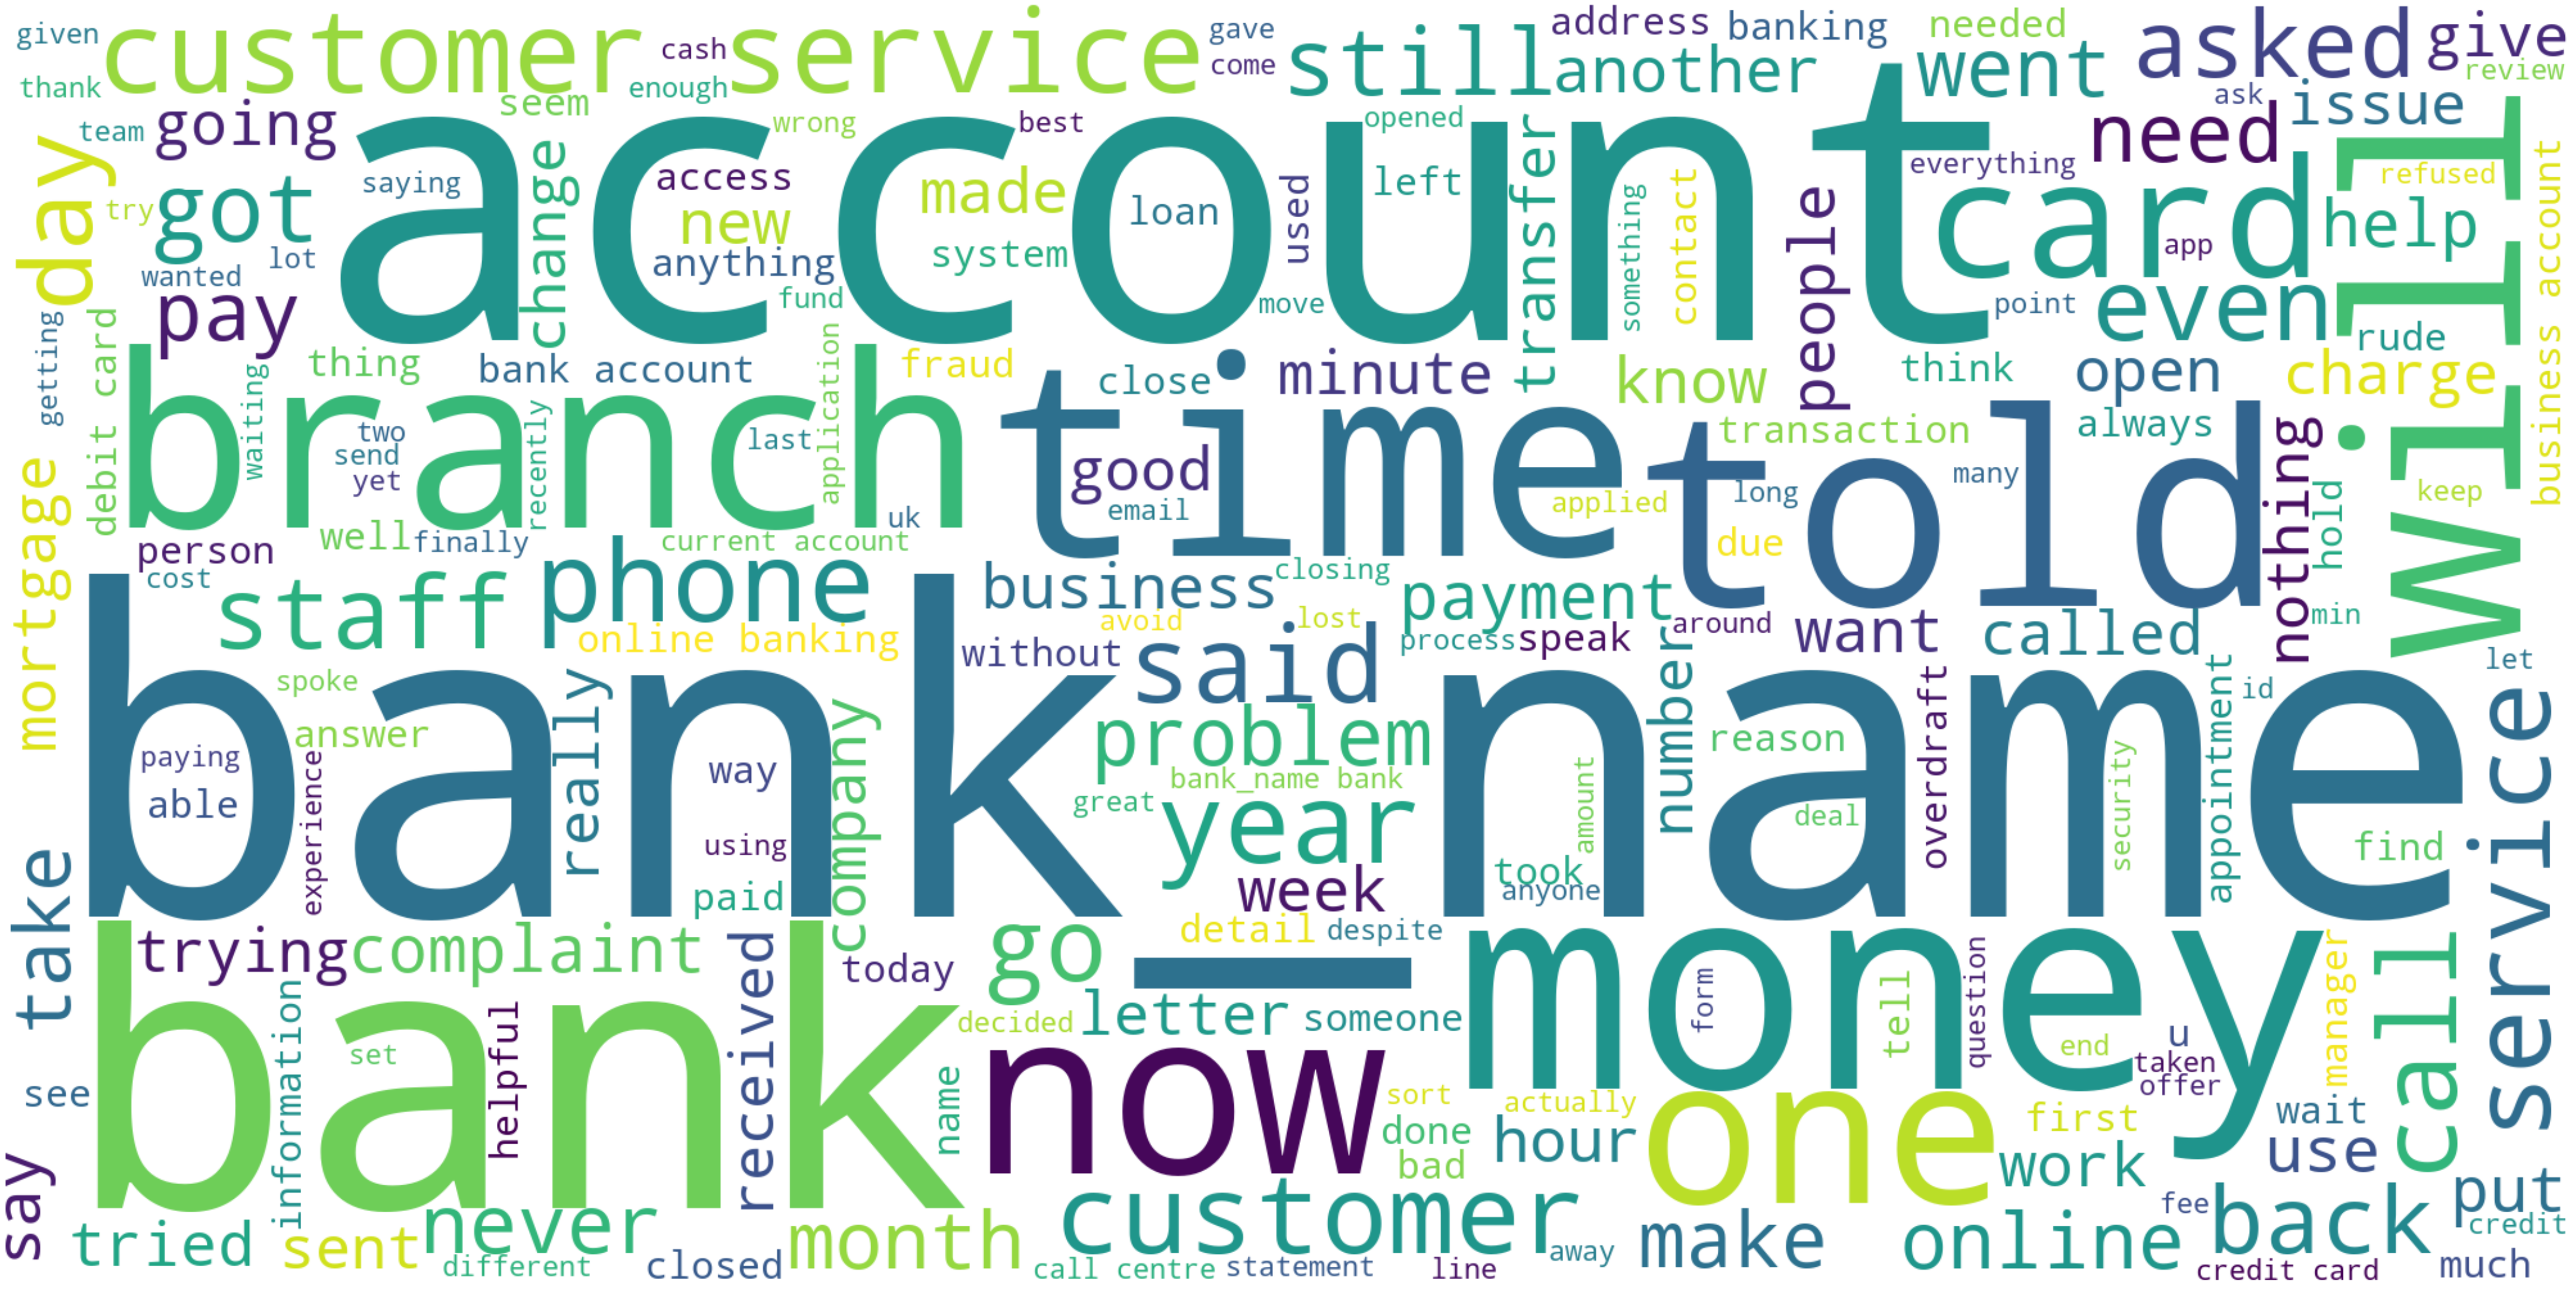

In [23]:
text = df.complaintText.to_list()
text = ' '.join(text).lower()
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, background_color='white', width = 2000,height=1000).generate(text)

plt.figure(figsize=(75,75))
plt.imshow(wordcloud,interpolation='bilInear')
plt.axis('off')
plt.show()

# Part of speech Tagging 

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader import tagged
from collections import OrderedDict

In [34]:
stopwords_set = set(stopwords.words("english"))

In [35]:
wordCount ={}

In [39]:
adjectives = {'JJ', 'JJR', 'JJS'}
adverbs = {'RB', 'RBR', 'RBS'}
nouns = {'NN', 'NNS', 'NNP', 'NPS'}
verbs = {'VB', 'VBD', 'VBN', 'VBP', 'VBZ'}
interestingTags = nouns
interestingTags

{'NN', 'NNP', 'NNS', 'NPS'}

In [43]:
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
for complaint in complaintList:
    tokenized = tokenizer.tokenize(complaint[2])
    
    for toks in tokenized:
        words = nltk.word_tokenize(toks)
        tagged = nltk.pos_tag(words)
        
        for word, gramTag in tagged:
            word =word.lower()
            if not word in stopwords_set:
                if gramTag in interestingTags:
                    wordCount.setdefault((word, gramTag),0)
                    wordCount[(word,gramTag)] += 1

In [44]:
wordCount

{('person', 'NN'): 151,
 ('branch', 'NN'): 672,
 ('crutches', 'NNS'): 3,
 ('area', 'NN'): 19,
 ('till', 'NN'): 11,
 ('tuff', 'NN'): 1,
 ('disability', 'NN'): 3,
 ('communities', 'NNS'): 1,
 ('ombudsman', 'NN'): 22,
 ('cctv', 'NNP'): 4,
 ('footage', 'NN'): 2,
 ('bank_name', 'NNP'): 2058,
 ('day', 'NN'): 267,
 ('bank', 'NNP'): 173,
 ('functioning', 'NN'): 1,
 ('*', 'NNP'): 46,
 ('bad', 'NNP'): 9,
 ('customer', 'NN'): 770,
 ('service', 'NN'): 860,
 ('counters', 'NNS'): 9,
 ('machine', 'NN'): 73,
 ('finance', 'NNP'): 3,
 ('pack', 'NN'): 13,
 ('con', 'NNP'): 2,
 ('merchants', 'NNS'): 4,
 ('misfortune', 'NN'): 4,
 ('bognor', 'NNP'): 1,
 ('regis', 'NNP'): 1,
 ('branch', 'NNP'): 24,
 ('today', 'NN'): 140,
 ('sum', 'NN'): 11,
 ('cash', 'NN'): 147,
 ('account', 'NN'): 1787,
 ('home', 'NN'): 89,
 ('debit', 'NN'): 165,
 ('card', 'NN'): 700,
 ('machines', 'NNS'): 18,
 ('morning', 'NN'): 55,
 ('didnt', 'NN'): 6,
 ('times', 'NNS'): 182,
 ('money', 'NN'): 759,
 ('receipt', 'NN'): 20,
 ('transacton', '

In [45]:
sortedWordCount = OrderedDict(sorted(wordCount.items(), key = lambda t : t[1], reverse=True))
sortedWordCount

OrderedDict([(('bank_name', 'NNP'), 2058),
             (('account', 'NN'), 1787),
             (('bank', 'NN'), 1380),
             (('service', 'NN'), 860),
             (('customer', 'NN'), 770),
             (('money', 'NN'), 759),
             (('card', 'NN'), 700),
             (('branch', 'NN'), 672),
             (('time', 'NN'), 594),
             (('phone', 'NN'), 531),
             (('years', 'NNS'), 494),
             (('banking', 'NN'), 489),
             (('business', 'NN'), 466),
             (('staff', 'NN'), 358),
             (('call', 'NN'), 322),
             (('days', 'NNS'), 320),
             (('customers', 'NNS'), 285),
             (('people', 'NNS'), 270),
             (('online', 'NN'), 269),
             (('day', 'NN'), 267),
             (('accounts', 'NNS'), 253),
             (('credit', 'NN'), 243),
             (('mortgage', 'NN'), 238),
             (('months', 'NNS'), 227),
             (('minutes', 'NNS'), 226),
             (('nothing', 'NN'), 223),

# Charting words with a specific PoS Tag 

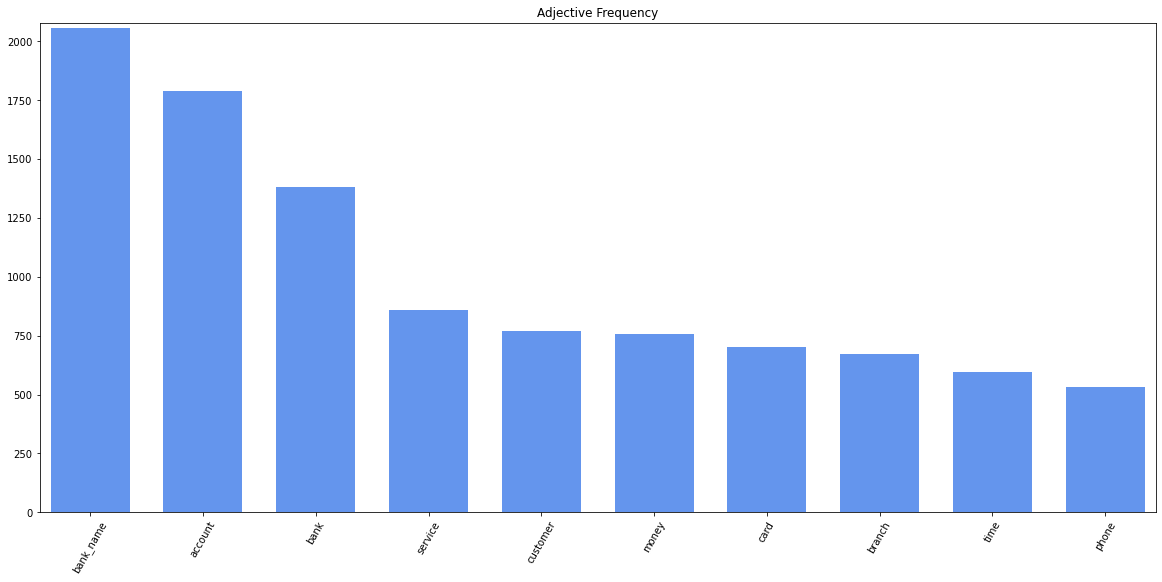

In [46]:
y =[]
labels = []

for word, frequency in sortedWordCount.items():
    y.append(frequency)
    labels.append(word[0])

listStart = 0
listEnd = 10
y = y[listStart: listEnd]
labels = labels[listStart: listEnd]

N = len(y)
x = range(N)
width = 0.7
plt.figure(figsize=(20,10))
plt.bar(x,y,width,color = 'cornflowerblue')
plt.title('Adjective Frequency')
plt.xticks(x,labels,rotation=60)
plt.margins(0.01)
plt.subplots_adjust(bottom=0.2)
plt.show()

# Sentiment analysis 

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [48]:
happyStudent = 'this is an excellent Machine Learning workshop'
vader.polarity_scores(happyStudent)

{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

In [50]:
grumpyStudent = 'this is an terrible Machine Learning workshop'
vader.polarity_scores(grumpyStudent)

{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

In [51]:
df

,customerID,summary,complaintText
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ..."
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...
...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...


In [52]:
df['scores'] = df['complaintText'].apply(lambda complaintText:
                                         vader.polarity_scores(text = complaintText))
df

,customerID,summary,complaintText,scores
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ...","{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'comp..."
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...,"{'neg': 0.079, 'neu': 0.833, 'pos': 0.088, 'co..."
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...,"{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp..."
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...,"{'neg': 0.1, 'neu': 0.855, 'pos': 0.045, 'comp..."
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...,"{'neg': 0.113, 'neu': 0.857, 'pos': 0.03, 'com..."
...,...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou..."
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...,"{'neg': 0.158, 'neu': 0.749, 'pos': 0.094, 'co..."
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp..."


In [53]:
df['scores'][0]

{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'compound': -0.5848}

In [55]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df

,customerID,summary,complaintText,scores,compound
0,Customer_1,B*rstards who take pleasure in harrasing disab...,"As a disabled person in an empty branch, they ...","{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'comp...",-0.5848
1,Customer_10,BANK_NAME - dont bother as they have little r...,Bad customer service in branch and not enough ...,"{'neg': 0.079, 'neu': 0.833, 'pos': 0.088, 'co...",-0.1531
2,Customer_100,I visited the Bognor Regis BANK_NAME,I visited the Bognor Regis BANK_NAME Branch t...,"{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...",-0.9770
3,Customer_101,Abysmal business service,Abysmal business service. If you are a busine...,"{'neg': 0.1, 'neu': 0.855, 'pos': 0.045, 'comp...",-0.7853
4,Customer_102,Disgusting company,I have company account with BANK_NAME and got...,"{'neg': 0.113, 'neu': 0.857, 'pos': 0.03, 'com...",-0.8811
...,...,...,...,...,...
1800,Customer_1805,Utterly time wasting,Worst ever service I have ever received.a bun...,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",-0.8020
1801,Customer_1806,Amazing customer service from andreia,You are lucky to have a lady like Andrea in y...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.9488
1802,Customer_1807,Is this Bank or...,You are more likely to get offended than sort...,"{'neg': 0.158, 'neu': 0.749, 'pos': 0.094, 'co...",-0.7177
1803,Customer_1808,worst bank in the UK,You know you have to change banks when a tran...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...",-0.4767


In [56]:
sortedSentiment = df.sort_values('compound')
sortedSentiment

,customerID,summary,complaintText,scores,compound
207,Customer_287,Bunch of crooks,Bunch of crooks Finally I spoke to the ombu...,"{'neg': 0.12, 'neu': 0.835, 'pos': 0.045, 'com...",-0.9962
696,Customer_73,Awful bank,Awful bank! They still hold my money without ...,"{'neg': 0.282, 'neu': 0.68, 'pos': 0.038, 'com...",-0.9955
190,Customer_270,Appalling service after fraud,Absolutely appalling experience with the frau...,"{'neg': 0.122, 'neu': 0.851, 'pos': 0.027, 'co...",-0.9952
662,Customer_7,No Customer service and no staff training,I have been a BANK_NAME Customer for the past ...,"{'neg': 0.171, 'neu': 0.791, 'pos': 0.038, 'co...",-0.9945
1663,Customer_1668,An unethical and immoral company that has cau...,I've banked with BANK_NAME for 25 years so I'...,"{'neg': 0.168, 'neu': 0.768, 'pos': 0.064, 'co...",-0.9944
...,...,...,...,...,...
1039,Customer_1044,Shambles,I can only imagine that anyone who gave BANK_...,"{'neg': 0.013, 'neu': 0.876, 'pos': 0.111, 'co...",0.9914
1707,Customer_1712,"Racism, incopetence and a way to feel how rid...",Ok...a story! A real one! (Croce my hart)In t...,"{'neg': 0.044, 'neu': 0.825, 'pos': 0.131, 'co...",0.9921
994,Customer_999,"Unhelpful, bad technology, deteriorating serv...",Have been with NW for almost 30years. That wa...,"{'neg': 0.064, 'neu': 0.651, 'pos': 0.284, 'co...",0.9953
961,Customer_966,"One of the best bank, I cannot recommend enough",First of all thank you for reading the review...,"{'neg': 0.044, 'neu': 0.736, 'pos': 0.22, 'com...",0.9960


In [57]:
sortedSentiment.loc[696].complaintText #loc返回行序为696的一行

" Awful bank! They still hold my money without legal consent. I ordered to transfer my  money to an accout i hold with another bank because I do not have a current account with BANK_NAME and they are reluctant to do the process; all excuses and apologies. Hence, I cannot use my money at all. I am in a hopeless situation where it seems that so much hard work and effort has been wasted because the bank is archaic and dishonest. These people are thieves and the courts have been informed. Soon they will also have to pay compensation. Upon the successful prosecution, I will do everything possible to destroy their reputation, since the media will be informed for their actions. This bank is the absolute evil. Thieves, corrupt, lazy, incompetent, reptiles, dishonest... plus, I will have to add the unhelpful customer service, the ridiculous system with their security checks that treats the customer like potential thieves, while the only thieves are themselves for holding without my consent 1200

In [59]:
sortedSentiment.iloc[0].complaintText # iloc直接返回目前的第0行

' Bunch of crooks  Finally I  spoke to the ombudsman service assistant over the phone \xa0Regarding BANK_NAME blackmail letter and verbally abuise & Bullied by BANK_NAME team  at BANK_NAME branch at 17 Anns square BANK_NAME bank Manchester .M2 7PW. *Incident  : 3. 30 pm on 14th july.  Citizen advice team advised me to phone to the financial ombudsmen .I received letter from BANK_NAME\xa0 on 25th july . what a blackmail !I\'ve  made  complaint about barcleys bank ; Address is \xa0. 17 St Anns Square, Manchester M2 7PW.Due to barcley bank\xa0constantly \xa0control my money and\xa0I feel extremely unsafe with barcley bank . I never have overdraft I\'m the  loyal customer over 5 years . my debit visa card have been trouble so many times: one cosmetic online company took out my money without my permission and  my money just gone even I did  not  put my pin number: I\'m using  disable contactless card.  And I already requested new debit visa card in BANK_NAME branch M2 7PW due to my card ins

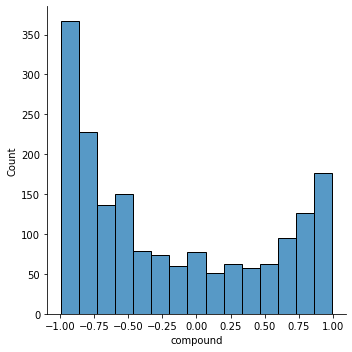

In [60]:
import seaborn as sns
sns.displot(df, x = "compound", bins = 15)

# Identifying themes in text: NMF(Non-negative factorisation) 

In [61]:
vectorized = pd.DataFrame(bagOfWords.toarray(), columns = vectorizer.get_feature_names())
vectorized

,00,000,10,100,1000,11,12,14,15,16,...,writing,written,wrong,wrote,year,years,yes,yesterday,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1801,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.decomposition import NMF

In [63]:
def display_topics(model, feature_names, num_top_words):
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i]
                         for i in topic.argsort()[:-num_top_words -1:-1]]))

In [64]:
n_themes = 20
n_iterations = 1000
n_top_words = 10

nmf_model = NMF(n_components=n_themes,
                random_state=1,
                alpha=.1,
                l1_ratio=.5,
                init='nndsvd',
                max_iter= n_iterations).fit(vectorized)

In [65]:
display_topics(nmf_model,vectorizer.get_feature_names(),n_top_words)


Topic  0
bank_name, company, years, accounts, use, say, investor, problem, smart, took

Topic  1
account, open, opened, closed, close, current, opening, reason, direct, went

Topic  2
card, debit, new, sent, address, pin, received, blocked, cards, home

Topic  3
bank, went, team, transaction, pay, worst, like, want, closed, staff

Topic  4
branch, appointment, local, address, went, needed, id, centre, called, change

Topic  5
money, pay, account, paid, payment, transfer, cash, want, people, don

Topic  6
service, customer, years, customers, terrible, poor, team, rude, services, 20

Topic  7
business, personal, accounts, banking, years, manager, know, need, don, number

Topic  8
mortgage, property, new, solicitor, woolwich, weeks, application, years, having, house

Topic  9
banking, online, telephone, access, transfer, pin, tried, need, app, accounts

Topic  10
said, asked, went, didn, did, know, customer, manager, open, let

Topic  11
phone, number, hold, minutes, calls, security, hou